In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import yfinance as yf

ImportError: Traceback (most recent call last):
  File "/Users/akhilkrishnamurthy/Documents/Work/twoset.ai/twosetaivenv/lib/python3.13/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Users/akhilkrishnamurthy/Documents/Work/twoset.ai/twosetaivenv/lib/python3.13/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Users/akhilkrishnamurthy/Documents/Work/twoset.ai/twosetaivenv/lib/python3.13/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 15, in swig_import_helper
    import imp
ModuleNotFoundError: No module named 'imp'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
ticker = 'AAPL'
df = yf.download(ticker)
open_values = df.iloc[:, 0:1].values
len(open_values)

[*********************100%***********************]  1 of 1 completed


11102

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
open_values = mms.fit_transform(open_values)
open_values

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X_train = []
y_train = []
marker = int(.8 * len(open_values))
for i in range(100, marker):
  X_train.append(open_values[i-100:i, 0])
  y_train.append(open_values[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

# change it to a 3D tensor

X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
X_train.shape

(8665, 100, 1)

In [ ]:
class BidirectionalGRU:
  def __init__(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train
    self.model = None
  
  def create_model(self):
    model = tf.keras.models.Sequential(
      layers=[
        tf.keras.layers.Input(shape=(self.x_train.shape[1], self.x_train.shape[2])),
        tf.keras.layers.Bidirectional(layer=tf.keras.layers.GRU(units=50, return_sequences=True)),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=50, return_sequences=True)),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=50, return_sequences=True)),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=50)),
        tf.keras.layers.Dense(1),
      ]
    )

    self.model = model

  def compile(self):
    self.model.compile(optimizer='adam', loss='mean_squared_error')
    return self.model.fit(self.x_train, self.y_train, batch_size=int(.07 * len(self.x_train)), epochs=3)

  def predict(self, x_test):
    return self.model.predict(x_test)

In [ ]:
model = BidirectionalGRU(X_train, y_train)
model.create_model()
model.compile()

2024-05-30 19:13:21.561625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
15/15 [==============================] - 18s 806ms/step - loss: 6.3991e-04
Epoch 2/3
15/15 [==============================] - 10s 694ms/step - loss: 7.5585e-05
Epoch 3/3
15/15 [==============================] - 10s 654ms/step - loss: 2.5590e-05


In [ ]:
X_test = []
y_truth = []

dataset_total = df['Open']
inputs = dataset_total.values
inputs = inputs.reshape(-1, 1)
inputs = mms.transform(inputs)

for i in range(marker, len(dataset_total)):
  X_test.append(inputs[i-100:i, 0])
  y_truth.append(inputs[i, 0])


X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_truth = np.array(y_truth).reshape(-1, 1) 
predicted_stock_price = model.predict(X_test)
predicted_stock_price = mms.inverse_transform(predicted_stock_price)
y_truth = mms.inverse_transform(y_truth)

print(predicted_stock_price)



NameError: name 'df' is not defined

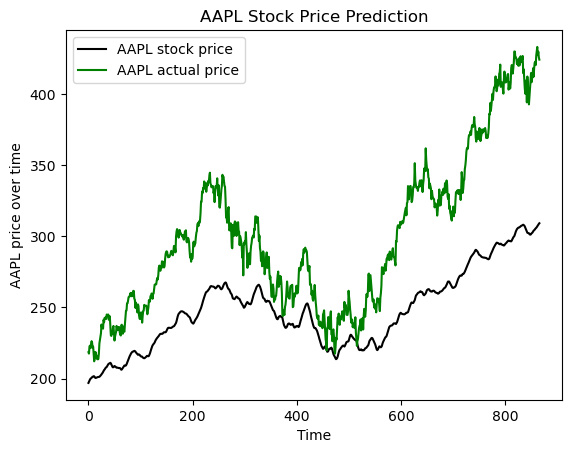

AAPL_stock_plot_gru.png


In [ ]:
import os

plt.plot(predicted_stock_price, color = 'black', label = f'{ticker} stock price')
plt.plot(y_truth, color = 'green', label = f'{ticker} actual price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{ticker} price over time')
plt.legend()

image_path = os.path.join(f'{ticker}_stock_plot_gru.png')

plt.savefig(image_path)
plt.show()
plt.close()
print(image_path)


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_truth, predicted_stock_price)
print(r2)

-0.17699610667603394


In [ ]:
input_data_2000 = X_test[-1]
print(input_data_2000)
input_data_2000 = input_data_2000.reshape((1, input_data_2000.shape[0], 1))
predicted_value = model.predict(input_data_2000)
predicted_value = mms.inverse_transform(predicted_value)
print(predicted_value)

# Append the predicted value to X_test and assign the result back to X_test
X_test = np.append(X_test, predicted_value)

# Now X_test contains the predicted value for the next timestep
# You can use X_test for further predictions or analysis


[[1.86351318]
 [1.86518003]
 [1.87886906]
 [1.90089248]
 [1.94953616]
 [1.94695997]
 [1.98822884]
 [1.95953771]
 [1.97842938]
 [1.99883652]
 [2.02035479]
 [1.99878596]
 [2.02803281]
 [2.04207531]
 [2.04232781]
 [2.05086446]
 [2.08218234]
 [2.05541056]
 [2.02949757]
 [2.03949912]
 [2.07026128]
 [2.04995527]
 [2.05783522]
 [2.09122399]
 [2.09728557]
 [2.12410775]
 [2.04520707]
 [2.06101754]
 [2.06137117]
 [2.06046182]
 [2.03661986]
 [2.02111261]
 [2.07172619]
 [2.09940716]
 [2.07814124]
 [2.06061336]
 [2.06157311]
 [2.0638968 ]
 [2.07718149]
 [2.08814279]
 [2.09076939]
 [2.03525608]
 [2.05116752]
 [2.06046182]
 [2.03924662]
 [2.05874441]
 [2.11168169]
 [2.12249131]
 [2.11769271]
 [2.0922343 ]
 [2.11031775]
 [2.13138158]
 [2.17093289]
 [2.17027636]
 [2.14774762]
 [2.14961656]
 [2.14370667]
 [2.12612823]
 [2.1412316 ]
 [2.12183462]
 [2.11991527]
 [2.14648481]
 [2.12132962]
 [2.14739415]
 [2.1538092 ]
 [2.13234133]
 [2.15067744]
 [2.14173661]
 [2.15461742]
 [2.09385074]
 [2.10738809]
 [2.07